In [3]:
# import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
path = '/Users/ijian/Documents/SPRINT/SPRINT_PART3/Part3_스프린트미션/미션14/train.csv'
df = pd.read_csv(path)
df.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [5]:
df.shape

(10886, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])

## Column description

| 컬럼명      | 데이터 타입 | 설명                                         |
|-------------|-------------|----------------------------------------------|
| datetime    | datetime    | 자전거 대여 기록의 날짜 및 시간. 예시: 2011-01-01 00:00:00 |
| season      | int         | 계절 (1: 봄, 2: 여름, 3: 가을, 4: 겨울)      |
| holiday     | int         | 공휴일 여부 (0: 평일, 1: 공휴일)             |
| workingday  | int         | 근무일 여부 (0: 주말/공휴일, 1: 근무일)      |
| weather     | int         | 날씨 상황 (1: 맑음, 2: 구름낌/안개, 3: 약간의 비/눈, 4: 폭우/폭설) |
| temp        | float       | 실측 온도 (섭씨)                            |
| atemp       | float       | 체감 온도 (섭씨)                            |
| humidity    | int         | 습도 (%)                                    |
| windspeed   | float       | 풍속 (m/s)                                  |
| casual      | int         | 등록되지 않은 사용자의 대여 수               |
| registered  | int         | 등록된 사용자의 대여 수                     |
| count       | int         | 총 대여 수 (종속 변수)                      |


# EDA

## 1. 결측치

In [8]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

- 결측치 없음

## 2. 중복

In [9]:
df.duplicated().sum()

0

- 중복값 없음

## 기술통계

In [10]:
df[['temp', 'atemp', 'humidity','windspeed','count']].describe()

,temp,atemp,humidity,windspeed,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,191.574132
std,7.79159,8.474601,19.245033,8.164537,181.144454
min,0.82000,0.760000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,42.000000
50%,20.50000,24.240000,62.000000,12.998000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,284.000000
max,41.00000,45.455000,100.000000,56.996900,977.000000


## 월별로 계절이 잘 매칭되었나?

In [23]:
# 카피한 데이터에서 사용
df_cp = df.copy()
df_cp['month'] = df_cp['datetime'].dt.month
df_cp['year'] = df_cp['datetime'].dt.year

In [25]:
df_cp.groupby(['year', 'month']).agg({
    'season' : 'mean'
})

season
year month        
2011 1         1.0
     2         1.0
     3         1.0
     4         2.0
     5         2.0
     6         2.0
     7         3.0
     8         3.0
     9         3.0
     10        4.0
     11        4.0
     12        4.0
2012 1         1.0
     2         1.0
     3         1.0
     4         2.0
     5         2.0
     6         2.0
     7         3.0
     8         3.0
     9         3.0
     10        4.0
     11        4.0
     12        4.0

- 어느나라 데이터인지 모르겠지만 계절이 분기별로 나누어져있다

## 월별 자전거 대여 수

In [11]:
df.sort_values(by='datetime').head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,16


In [12]:
df.sort_values(by='datetime').tail(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


- 11년 1월1일부터 12년 12월19일까지 약 2년간 데이터

In [14]:
monthly_count_df = df_cp.groupby(['year', 'month']).agg({
    'count' : 'sum'
}).reset_index()

monthly_count_df

,year,month,count
0,2011,1,23552
1,2011,2,32844
2,2011,3,38735
3,2011,4,50517
4,2011,5,79713
5,2011,6,89776
6,2011,7,92848
7,2011,8,83296
8,2011,9,79104
9,2011,10,79522


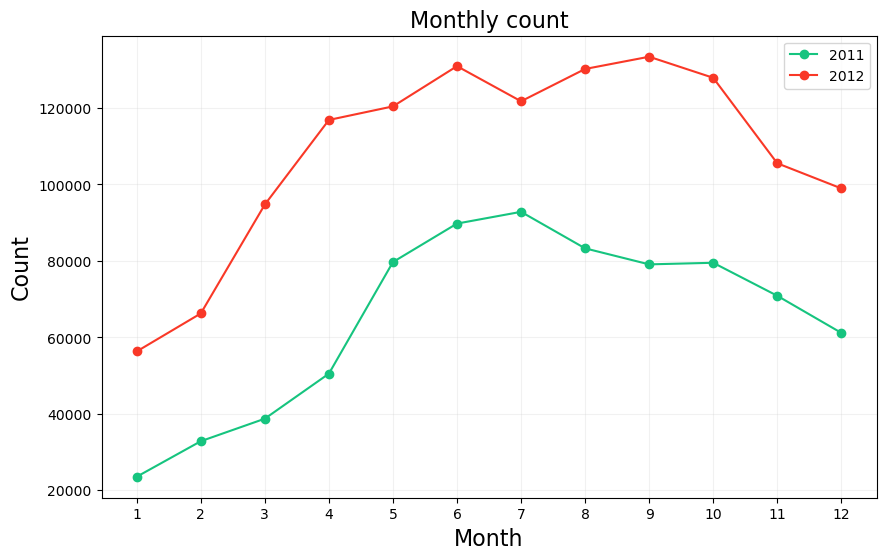

In [21]:
plt.figure(figsize=(10, 6))

# 2011년
plt.plot(
    monthly_count_df[monthly_count_df['year'] == 2011]['month'],
    monthly_count_df[monthly_count_df['year'] == 2011]['count'],
    label='2011',
    marker='o',
    color = '#16C47F'
)

# 2012년 
plt.plot(
    monthly_count_df[monthly_count_df['year'] ==2012]['month'],
    monthly_count_df[monthly_count_df['year'] ==2012]['count'],
    label='2012',
    marker='o',
    color = '#F93827'
)

plt.title('Monthly count', fontsize=16)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(range(1, 13)) 
plt.legend()
plt.grid(alpha=0.3, color = 'lightgrey')
plt.show()


- 12년도에 11년도에 비해 대여수가 증가했다 